In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
from pathlib import Path
import os
import matplotlib.pyplot as plt
import time

In [4]:
THRESHOLD = 20
K = 5
OUTPUT_FILENAME = 'periods.npy'
CUR_PATH = os.path.abspath('') #os.path.realpath(os.path.join(os.getcwd(), os.path.dirname(__file__)))
output_file = (os.path.join(CUR_PATH, OUTPUT_FILENAME))

In [15]:
mod_path = Path(CUR_PATH)
relative_path = '../../data/raw.csv'
DATA_PATH = (mod_path / relative_path).resolve()  # 'data/raw.csv'
print(DATA_PATH)
colnames = ['time', 'can', 'id', 'dlc', 'payload']
dataset = pd.read_csv(DATA_PATH, names=colnames, header=None)

/home/tommaso/Desktop/IDS/data/raw.csv


In [18]:
id_periods = dict()
id = '0DE'
id_packets = dataset.loc[dataset['id'] == id]
print(id_packets.shape)
times_of_arrival = id_packets['time'].to_numpy()
periods = np.diff(times_of_arrival)
print(periods)

(116148, 5)
[0.0102191  0.00985408 0.01045489 ... 0.01003599 0.00971985 0.01024914]


In [19]:
def compute_range(k: int, periods: np.array):
    avg = periods.mean()
    sigma = periods.std()
    range_min = avg - k*sigma
    range_max = avg + k*sigma
    return range_min,range_max

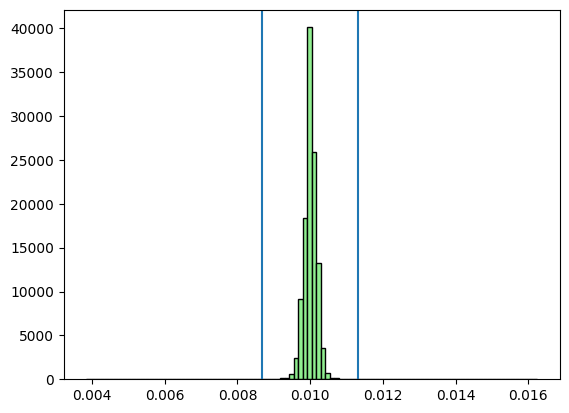

In [21]:
plt.hist(periods, color='lightgreen', ec='black', bins=100)
r_min, r_max = compute_range(K, periods)
plt.axvline(r_min, 0, 1, label='min')
plt.axvline(r_max, 0, 1, label='max')
plt.show()